### CNN multiclass classification
#### Cifar10


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math
from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from collections import Counter
import pandas as pd
from tensorflow.keras.callbacks import Callback
from datetime import datetime, timezone
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
import tensorflow as tf


In [2]:
import gc
model = None
gc.collect()

35

In [3]:
# How to check if the code is running on GPU or CPU?
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.test.is_gpu_available()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16399117294531898709
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6616023695
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 7953753780581290091
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:0a:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 6616023695
locality {
  bus_id: 1
  links {
    link {
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 11294036692623950001
physical_device_desc: "device: 1, name: GeForce GTX 1070, pci bus id: 0000:0b:00.0, compute capability: 6.1"
]


True

In [4]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)
## pixel normalization to float 
X_train = X_train/255.0
X_test = X_test/255.0
X_train[0,0,0]

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print('Y:', Y_test.shape)

(10000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 1)
(50000, 1)
Y: (10000, 10)


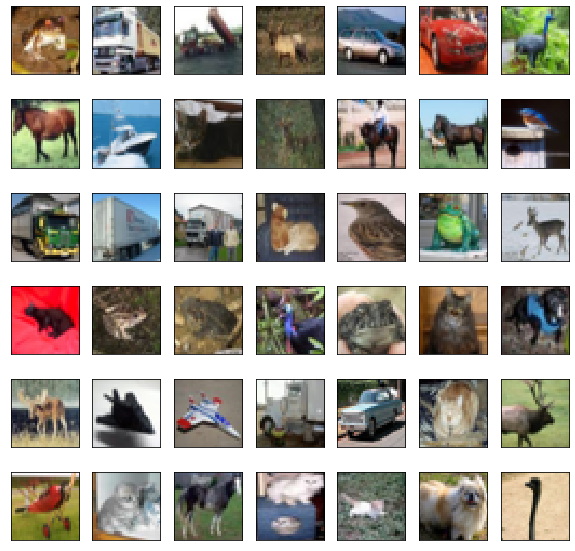

In [5]:
fig= plt.figure(figsize=(10,10))

for i in range(42):
    ax = fig.add_subplot(6,7, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

### The model instance creation & compile part should be inside the MirroredStrategy statement.

In [6]:
tf.debugging.set_log_device_placement(True)

In [7]:
## Dual  GPU 
#strategy =  tf.distribute.MirroredStrategy()
#strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"],cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0"],cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
with strategy.scope():
    model = Sequential()
    # Block 1
    model.add(Conv2D(filters=16, kernel_size=3, padding='same', strides=1, activation='relu', input_shape=(32,32,3,)))
    model.add(MaxPool2D(pool_size=2))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', strides=1, activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', strides=1, activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', strides=1, activation='relu'))    
    model.add(MaxPool2D(pool_size=2))
        
    model.add(Flatten())
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu', name='fc2'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax', name='predictions')) #최종은 항상 클래스 종류의 개수 
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr = 1e-4, momentum=0.9), metrics=['accuracy'])

    
    
model.summary()

Number of devices: 1
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:lo

In [8]:
hist = model.fit(X_train, Y_train, batch_size=1024, epochs=320, validation_split=0.2)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Te

Epoch 20/320
40000/40000 [==============================] - 4s 91us/sample - loss: 1.8814 - accuracy: 0.3525 - val_loss: 1.6383 - val_accuracy: 0.4240
Epoch 21/320
40000/40000 [==============================] - 4s 94us/sample - loss: 1.8742 - accuracy: 0.3584 - val_loss: 1.6228 - val_accuracy: 0.4246
Epoch 22/320
40000/40000 [==============================] - 4s 93us/sample - loss: 1.8515 - accuracy: 0.3675 - val_loss: 1.6158 - val_accuracy: 0.4279
Epoch 23/320
40000/40000 [==============================] - 4s 90us/sample - loss: 1.8364 - accuracy: 0.3673 - val_loss: 1.6132 - val_accuracy: 0.4329
Epoch 24/320
40000/40000 [==============================] - 4s 98us/sample - loss: 1.8283 - accuracy: 0.3756 - val_loss: 1.5913 - val_accuracy: 0.4372
Epoch 25/320
40000/40000 [==============================] - 4s 92us/sample - loss: 1.8146 - accuracy: 0.3766 - val_loss: 1.5768 - val_accuracy: 0.4440
Epoch 26/320
40000/40000 [==============================] - 3s 83us/sample - loss: 1.8021 - ac

40000/40000 [==============================] - 4s 91us/sample - loss: 1.4820 - accuracy: 0.4845 - val_loss: 1.3490 - val_accuracy: 0.5279
Epoch 75/320
40000/40000 [==============================] - 3s 78us/sample - loss: 1.4814 - accuracy: 0.4833 - val_loss: 1.3441 - val_accuracy: 0.5319
Epoch 76/320
40000/40000 [==============================] - 3s 83us/sample - loss: 1.4738 - accuracy: 0.4828 - val_loss: 1.3583 - val_accuracy: 0.5274
Epoch 77/320
40000/40000 [==============================] - 3s 86us/sample - loss: 1.4626 - accuracy: 0.4863 - val_loss: 1.3433 - val_accuracy: 0.5289
Epoch 78/320
40000/40000 [==============================] - 4s 89us/sample - loss: 1.4658 - accuracy: 0.4888 - val_loss: 1.3353 - val_accuracy: 0.5328
Epoch 79/320
40000/40000 [==============================] - 4s 91us/sample - loss: 1.4625 - accuracy: 0.4860 - val_loss: 1.3395 - val_accuracy: 0.5321
Epoch 80/320
40000/40000 [==============================] - 3s 70us/sample - loss: 1.4620 - accuracy: 0.490

40000/40000 [==============================] - 3s 87us/sample - loss: 1.2970 - accuracy: 0.5424 - val_loss: 1.2738 - val_accuracy: 0.5531
Epoch 129/320
40000/40000 [==============================] - 4s 90us/sample - loss: 1.2941 - accuracy: 0.5440 - val_loss: 1.2258 - val_accuracy: 0.5717
Epoch 130/320
40000/40000 [==============================] - 4s 93us/sample - loss: 1.2924 - accuracy: 0.5478 - val_loss: 1.2253 - val_accuracy: 0.5717
Epoch 131/320
40000/40000 [==============================] - 4s 93us/sample - loss: 1.2928 - accuracy: 0.5444 - val_loss: 1.2244 - val_accuracy: 0.5690
Epoch 132/320
40000/40000 [==============================] - 3s 84us/sample - loss: 1.2923 - accuracy: 0.5475 - val_loss: 1.2742 - val_accuracy: 0.5546
Epoch 133/320
40000/40000 [==============================] - 4s 88us/sample - loss: 1.2864 - accuracy: 0.5456 - val_loss: 1.2800 - val_accuracy: 0.5491
Epoch 134/320
40000/40000 [==============================] - 4s 88us/sample - loss: 1.2852 - accuracy:

Epoch 182/320
40000/40000 [==============================] - 3s 83us/sample - loss: 1.1791 - accuracy: 0.5831 - val_loss: 1.1624 - val_accuracy: 0.5899
Epoch 183/320
40000/40000 [==============================] - 3s 82us/sample - loss: 1.1728 - accuracy: 0.5870 - val_loss: 1.1618 - val_accuracy: 0.5909
Epoch 184/320
40000/40000 [==============================] - 3s 85us/sample - loss: 1.1735 - accuracy: 0.5840 - val_loss: 1.1503 - val_accuracy: 0.6014
Epoch 185/320
40000/40000 [==============================] - 3s 84us/sample - loss: 1.1713 - accuracy: 0.5868 - val_loss: 1.1977 - val_accuracy: 0.5772
Epoch 186/320
40000/40000 [==============================] - 4s 98us/sample - loss: 1.1678 - accuracy: 0.5889 - val_loss: 1.1526 - val_accuracy: 0.5959
Epoch 187/320
40000/40000 [==============================] - 4s 89us/sample - loss: 1.1669 - accuracy: 0.5889 - val_loss: 1.1575 - val_accuracy: 0.5949
Epoch 188/320
40000/40000 [==============================] - 4s 98us/sample - loss: 1.16

Epoch 236/320
40000/40000 [==============================] - 3s 74us/sample - loss: 1.0928 - accuracy: 0.6139 - val_loss: 1.1342 - val_accuracy: 0.6033
Epoch 237/320
40000/40000 [==============================] - 3s 79us/sample - loss: 1.0862 - accuracy: 0.6153 - val_loss: 1.1376 - val_accuracy: 0.5991
Epoch 238/320
40000/40000 [==============================] - 4s 92us/sample - loss: 1.0927 - accuracy: 0.6143 - val_loss: 1.1307 - val_accuracy: 0.6004
Epoch 239/320
40000/40000 [==============================] - 4s 95us/sample - loss: 1.0832 - accuracy: 0.6178 - val_loss: 1.1111 - val_accuracy: 0.6156
Epoch 240/320
40000/40000 [==============================] - 3s 84us/sample - loss: 1.0870 - accuracy: 0.6160 - val_loss: 1.1232 - val_accuracy: 0.6054
Epoch 241/320
40000/40000 [==============================] - 4s 92us/sample - loss: 1.0832 - accuracy: 0.6178 - val_loss: 1.1017 - val_accuracy: 0.6160
Epoch 242/320
40000/40000 [==============================] - 3s 83us/sample - loss: 1.08

Epoch 290/320
40000/40000 [==============================] - 4s 95us/sample - loss: 1.0333 - accuracy: 0.6368 - val_loss: 1.0941 - val_accuracy: 0.6195
Epoch 291/320
40000/40000 [==============================] - 4s 93us/sample - loss: 1.0266 - accuracy: 0.6384 - val_loss: 1.1204 - val_accuracy: 0.6038
Epoch 292/320
40000/40000 [==============================] - 3s 80us/sample - loss: 1.0263 - accuracy: 0.6387 - val_loss: 1.1121 - val_accuracy: 0.6081
Epoch 293/320
40000/40000 [==============================] - 3s 86us/sample - loss: 1.0193 - accuracy: 0.6417 - val_loss: 1.0838 - val_accuracy: 0.6244
Epoch 294/320
40000/40000 [==============================] - 4s 93us/sample - loss: 1.0217 - accuracy: 0.6414 - val_loss: 1.0908 - val_accuracy: 0.6225
Epoch 295/320
40000/40000 [==============================] - 3s 87us/sample - loss: 1.0226 - accuracy: 0.6392 - val_loss: 1.0553 - val_accuracy: 0.6312
Epoch 296/320
40000/40000 [==============================] - 4s 90us/sample - loss: 1.02

In [9]:
score = model.evaluate(X_test, Y_test)
score

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_distributed_function_53745 in device /job:localhost/replica:0/task:0/device:GPU:0
10000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.0816933380126954, 0.6183]

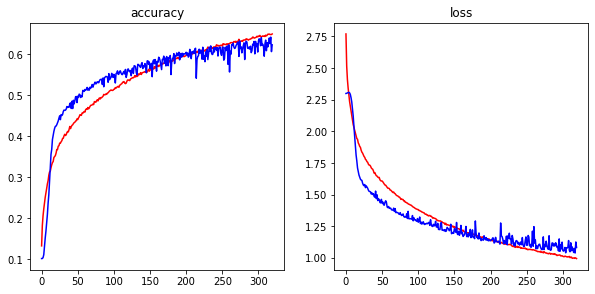

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.plot(hist.history['accuracy'], color='r')
plt.plot(hist.history['val_accuracy'], color='b')
plt.title('accuracy')

#loss 조회
plt.subplot(2, 2, 2)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')
plt.show()

In [11]:
pred = model.predict(X_test)
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MultiDeviceIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Ex

6  vs  6
4  vs  4
5  vs  5
0  vs  0
1  vs  1
2  vs  2
0  vs  7
0  vs  0
4  vs  4
1  vs  2
0  vs  0
0  vs  0
2  vs  2
0  vs  0
0  vs  0
1  vs  9
1  vs  9
2  vs  2
6  vs  6
6  vs  2
1  vs  9
0  vs  0
9  vs  9
2  vs  0
0  vs  5
1  vs  9
1  vs  8
1  vs  0
6  vs  6
2  vs  2
5  vs  5
8  vs  4


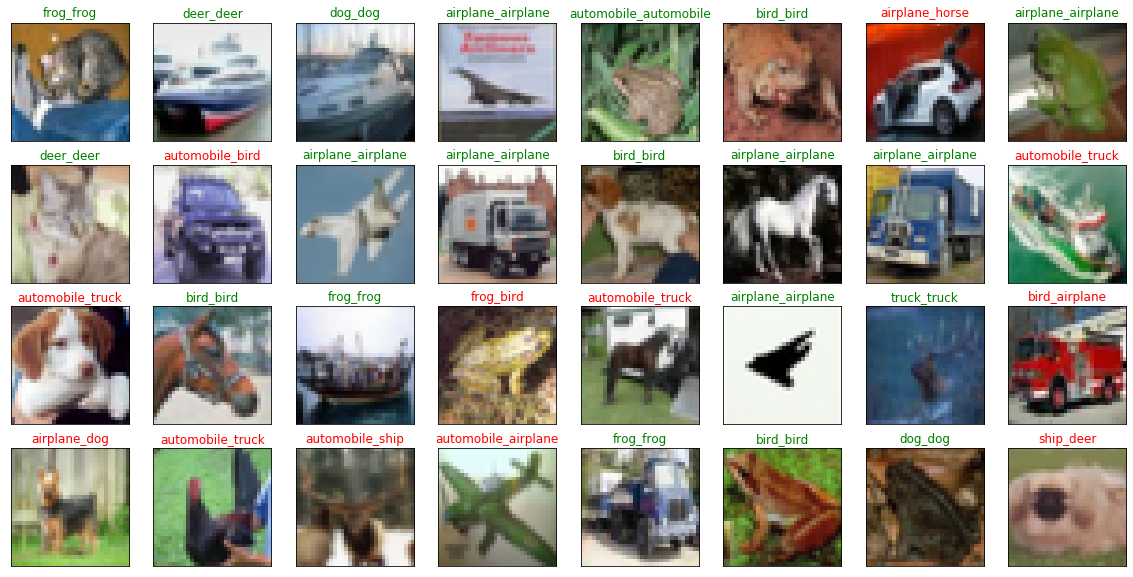

In [12]:
fig = plt.figure(figsize=(20,10))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32)):
    ax = fig.add_subplot(4, 8, i+1, xticks=[], yticks=[]) ##32개
    ax.imshow(X_test[i])
    pred_idx = np.argmax(pred[idx]) #iinverse one hot encode : prediction label 
    true_idx = np.argmax(Y_test[idx])# iinverse one hot encode :
    print(pred_idx, " vs ", true_idx)
    ax.set_title("{}_{}".format(label[pred_idx], label[true_idx]), color='green' if pred_idx == true_idx else 'red')